# The matrix as a linear machine


We can think of a matrix $A \in \mathbb{R}^{m\times n}$ as a "linear machine" that transforms data from $\mathbb{R}^{n}$ to $\mathbb{R}^{m}$. One way of thinking about this is that the matrix $A \in \mathbb{R}^{m\times n}$ warps the vector space $\mathbb{R}^{n}$ into $\mathbb{R}^{m}$, but in a very particular and limited way - specifically, the transformation is *linear* 


## $m = 1, n = 1$
- the linear machine from input space $x \in \mathbb{R}$ to the output space $y \in \mathbb{R}$ can be expressed as: $y = ax$. 
- If $|a| > 1$, the linear machine is "stretching" the input space
- If $0 < |a| < 1$, the linear machine is "shrinking" the input space
- This linear machine is **one-to-one** because for every $y$ we can find the corresponding $x$ **unless** $a = 0$. If $a = 0$, then the linear transformation is not one-to-one. In that case $y = 0$ for any $x$ and the value of $x$ is *not* recoverable after the transformation
- Note, however, in practice if $a \neq 0$ but $|a| \ll |x|$ (that is, the input we see is typically much larger than $a$), then effectively we the transformation is *not* one-to-one

##  $m = 1, n = 2$
- $y = \begin{bmatrix}a & b \end{bmatrix} \begin{bmatrix} x_{1}\\  x_{2} \end{bmatrix}$
- Can also be written as $y = ax_{1} + bx_{2}$
- This transformation is never one-to-one. For a given $y$, there can be infinitely many $x_1$ and $x_2$
- Any $x_1$ and $x_2$ **orthogonal** to $a$ and $b$ will always get mapped to 0! This subset of $x_1$ and $x_2$ forms a **subspace** and is referred to as the **Null Space**. That is, all $x_1$ and $x_2$ that satisfy the equation $ax_{1} + bx_{2} = 0$ is called the null space. Again, there can be an infinity of $x_1$ and $x_2$ that satisfy this condition. 
- In other words, the **Null Space** is the *subset of the input* that always maps to 0. 



## $m = 2, n = 1$
- Even though the linear machine is transforming from a smaller dimension input space $x \in \mathbb{R}$  (1 dimensional data) to a larger space $y \in \mathbb{R}^{2}$ (2 dimensional data), the effective dimension of the output space is still limited to 1 dimension. 
- The subset of $y_1$ and $y_2$ that is mapped by the 2-by-1 linear machine is a **subspace** and is referred to as the **Range Space** or **Image** of $A$. 
- In other words, the **Range Space** of $A$ is the *subset of the output* that is reachable by the input. 

## $m = 2, n = 2$
- In this case, the input dimension and the output dimension are the same. However, if the matrix $A$ is designed in a particular way, then it's possible that the **Range Space** is limited similar to the case of $m = 2, n = 1$. 
- Similarly, for particular values of $A$, the **Null Space** will be the trivial singleton set $\{x_1 = 0, x_2 = 0\}$. 


In [52]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [53]:
A = np.array([[1,10], 
              [1.5,10]])

N = 1000                 # Number of measurements
x = np.random.randn(2,N)   # a bunch of measurements in inches
y = np.dot(A, x).T

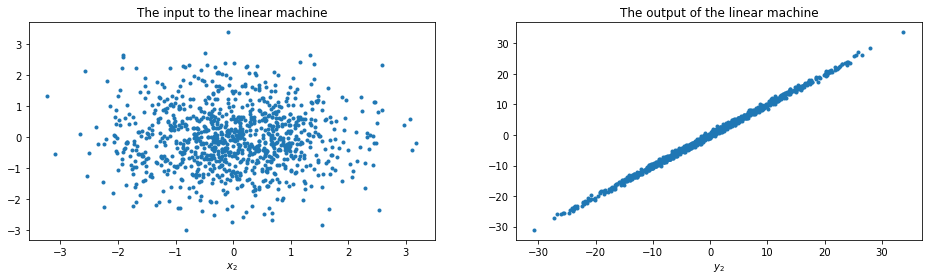

In [54]:
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.plot(x[0,:], x[1,:], '.')
plt.title("The input to the linear machine")
plt.xlabel("$x_{1}$")
plt.xlabel("$x_{2}$")


plt.subplot(1,2,2)
plt.plot(y[:,0], y[:,1], '.')
plt.title("The output of the linear machine")
plt.xlabel("$y_{1}$")
plt.xlabel("$y_{2}$")

# Singular Value Decomposition

**Theorem**: Any matrix $A \in \mathbb{R}^{m\times n}$ can be written as:

$\qquad\qquad\qquad\qquad A = U \Sigma V^{T}$ 

where $U \in \mathbb{R}^{m\times m}$ and $V \in \mathbb{R}^{n\times n}$ are *orthnonormal matrices* and $\Sigma \in \mathbb{R}^{m\times n}$ is a *diagonal* matrix with *all positive entries*.

- Because $U$ and $V$ are *orthnonormal matrices*, we have $V^{T}V = \textbf{I}$ and $U^{T}U = \textbf{I}$
- Orthonormal matrices are always square, and symmetric $U^{T} = U$
- Orthonormal matrices are always one-to-one: 

$\qquad z = U^{T}x$

- Can we get back $x$ after the linear transformation? Yes because $U$ is orthonormal:

$\qquad Uz = UU^{T}x \implies x$

-  Aside: orthonormal projections can be extremely powerful! Consider, for examples, the *Fourier transform.*

<br>
- A diagonal matrix simply scales each element of the vector (does not combine elements)

$\qquad\textbf{diag}(\sigma_1, \ldots, \sigma_n) \begin{bmatrix} z_{1}\\ \vdots \\ z_{n} \end{bmatrix} = 
\begin{bmatrix} \sigma_1z_{1}\\ \vdots \\ \sigma_nz_{n} \end{bmatrix}$  
- The diagonal matrix in $\Sigma$ in Singular Value Decomposition has the further property that all the diagonal elements are positive and placed in descending order. So for $\Sigma = \textbf{diag}(\sigma_1, \ldots, \sigma_r)$, we have

$\qquad\sigma_{1} \ge \sigma_{2} \ge \ldots \sigma_{r} \ge 0$ 


(The value of $r$ will be discussed below). 

So the Singular Value Decomposition (SVD) decomposes *any* matrix into three matrices that have very special properties and structure. This enables us to think of a matrix $A$ as a linear machine that transforms data from $x \in \mathbb{R}^{n}$ to $y \in \mathbb{R}^{m}$ as a process of going through three transformations:

1. $x$ is projected (or "expressed") by the *input* basis set contained in $V$ into the vector $z$
2. The projection $z$ is then scaled by the elemnets in the diagnoal matrix $Sigma$ into the vector $\hat{z}$
3. The scaled projection $\hat{z}$ is then projected into the *output* space 

<img src="./imgs/lecture-2/svd-transformation.png" alt="Drawing" style="width: 900px;"/ align="left">

## Why do we care?
At this point you might be asking "wait, what is so interesting about this? Instead of having to deal with 1 matrix multiplication $Ax$, I know have to deal with 3: $U\Sigma V^{T} x$. 

How is this helpful?"

Recall that we described the matrix $A \in \mathbb{R}^{n\times m}$ as a linear machine that takes inputs from $x \in \mathbb{R}^{n}$ to outputs $y \in \mathbb{R}^{m}$. The SVD untagles how this transformation takes place. Specifically,

- The first projection $V$ dictates the relevant *basis set for the input space*. Put another way, the first projection $V$ determines what the "natural coordinate system" for the input space *should* be. So the first projection is re-expressing the input $x \in \mathbb{R}^{n}$ into the coordinate system that the linear machine cares about. Note that because $V$ is an orthonormal matrix (and so is one-to-one), re-expressing the input $x$ with the range space of $V$ does not mean we have lost any information. Let's refer this first projection as $z = V^{T}x$

- The diagonal matrix then *scales* each coordinate in terms of how important these natural coordinates are. A lot of times in practice $\sigma_1 \gg \sigma_n$. What this means is that a subset of the coordinates can be effectively dropped. This is a key point. If every single coordinate was important,then all $\sigma_i$ would be equal. Let's refer to this scaling as $\widehat{z} = \Sigma z$.

- The last projection $U$ dictates the relevant *basis set for the output space.*  That is, $U$ re-expresses the scaled transformation $\widehat{z}$  in terms of the coordinates relevant for the output space. 

In [55]:
 A = np.array([[1,10], 
              [14,10]])

U, s, V = np.linalg.svd(A)

N = 1000                 # Number of measurements
x = np.random.randn(2,N)   # a bunch of measurements in inches
z = np.dot(V, x).T

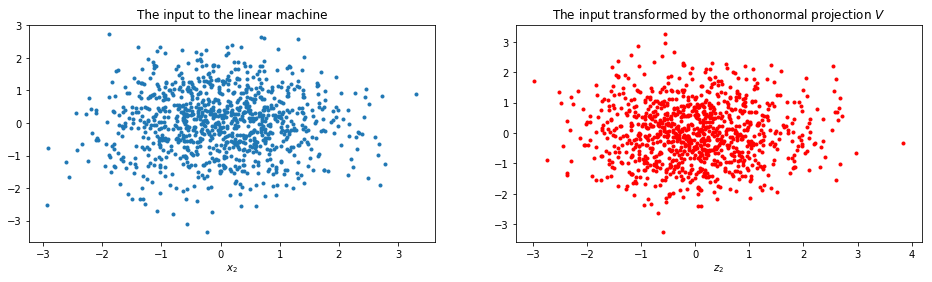

In [56]:
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.plot(x[0,:], x[1,:], '.')
plt.title("The input to the linear machine")
plt.xlabel("$x_{1}$")
plt.xlabel("$x_{2}$")


plt.subplot(1,2,2)
plt.plot(z[:,0], z[:,1], 'r.')
plt.title("The input transformed by the orthonormal projection $V$")
plt.xlabel("$z_{1}$")
plt.xlabel("$z_{2}$")

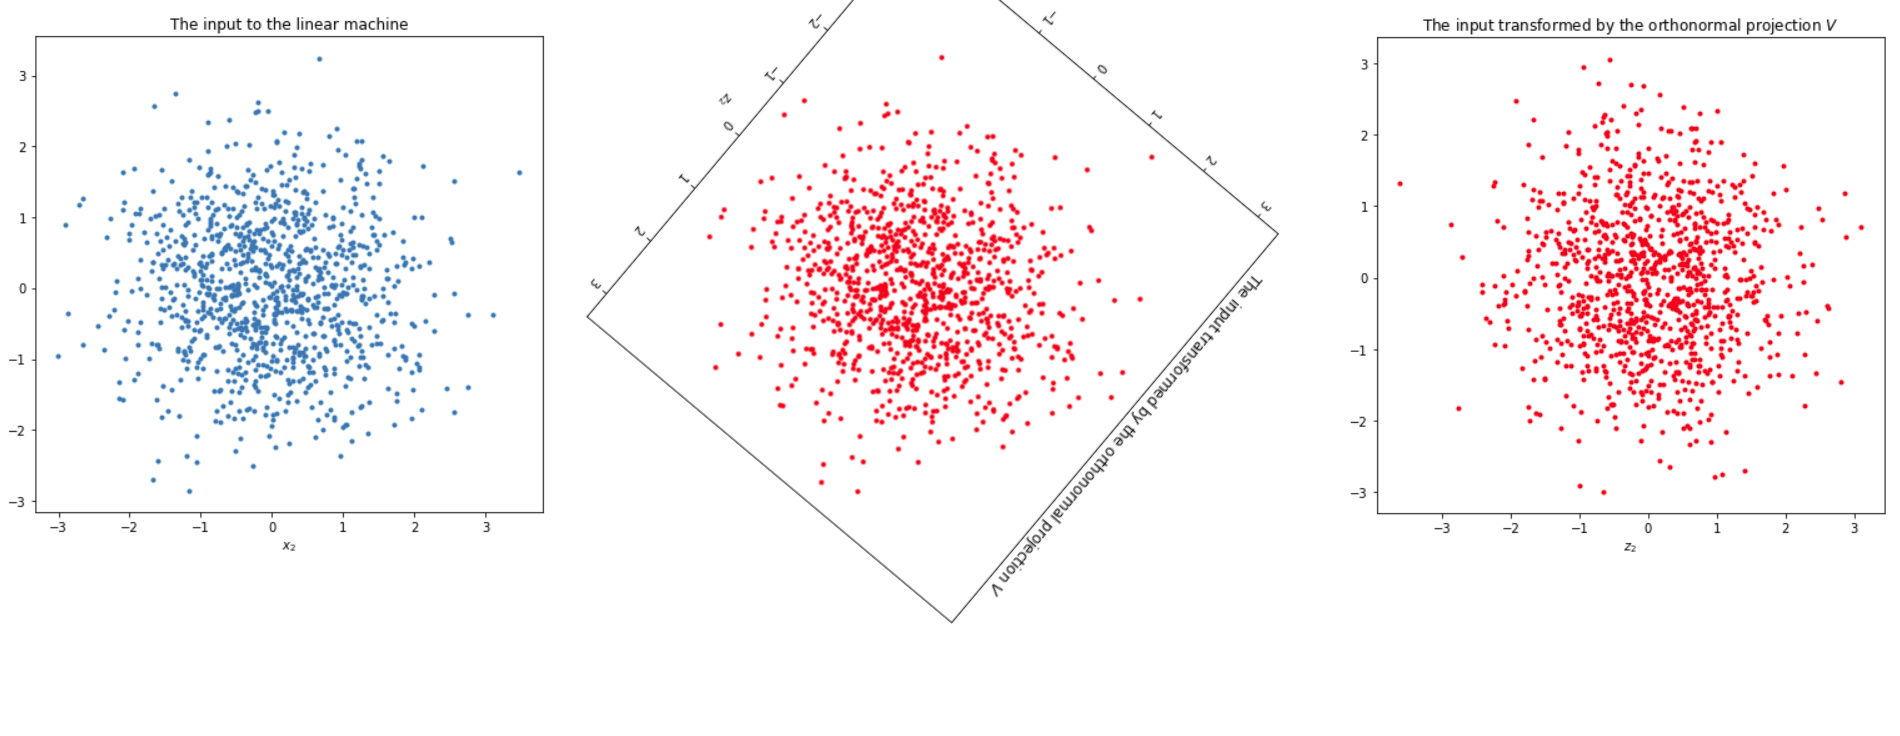

In [57]:
z_hat = np.dot(np.diag(s), z.T).T

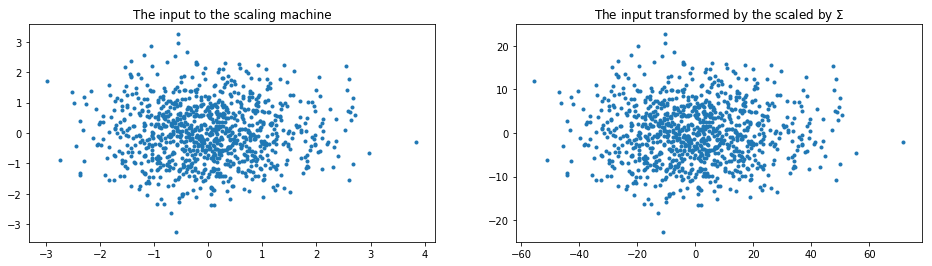

In [58]:
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.plot(z[:,0], z[:,1], '.')
plt.title("The input to the scaling machine")

plt.subplot(1,2,2)
plt.plot(z_hat[:,0], z_hat[:,1], '.')
plt.title("The input transformed by the scaled by $\Sigma$")  # notice the axis is scaled. 


In [59]:
y = np.dot(U, z_hat.T).T

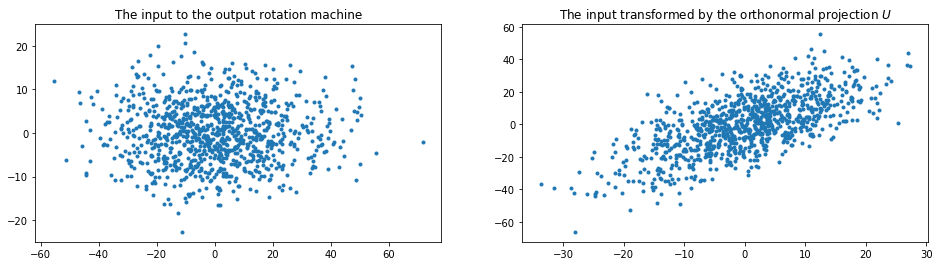

In [60]:
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.plot(z_hat[:,0], z_hat[:,1], '.')
plt.title("The input to the output rotation machine")

plt.subplot(1,2,2)
plt.plot(y[:,0], y[:,1], '.')
plt.title("The input transformed by the orthonormal projection $U$")


# The structure of SVD and the notion of rank

Let's peek a bit more into the structure of the SVD. The matrix $A \in \mathbb{R}^{m\times n}$ has $m$ rows and $n$ columns. 

Since SVD says $A = U\Sigma V^{T}$, then

- $V \in \mathbb{R}^{n\times n}$ and $U \in \mathbb{R}^{m\times m}$
- $\Sigma \in \mathbb{R}^{m\times n}$ 

$\Sigma$ is the only non-square matrix (unless $m = n$) and as we discussed it is diagonal. That is, $\Sigma = \textbf{diag}(\sigma_1, \ldots, \sigma_r)$

What is the value for $r$? In general, $r \le \text{min}(m, n)$.

Note that it is possible for $r$ to be strictly less than $\text{min}(m, n)$ and in fact it is often $r \ll \text{min}(m, n)$! This is a very important and practical property. To start, if $r < \text{min}(m, n)$, then we can write a more compressed version of SVD.

<img src="./imgs/lecture-2/svd-rank.jpg" alt="Drawing" style="width: 600px;"/ align="left">

$r$ is referred to as the rank a matrix. It is related to two different types of rank. The *row rank* and the *column rank*. For an $A \in \mathbb{R}^{m\times n}$ matrix,

- Row rank: the number of row vectors that are independent. It is always $\le m$. This is sometimes also referred to as the *dimension* of the row space. We will call this $d_r$.
- Column rank: the number of column vectors that are independent. It is always $\le n$. This is somtimes also referred to as the *dimension* of the column space. We will call this $d_c$.

So the rank $r$ matrix is $r = \text{min}(d_r, d_c)$ and is the *inherrit* dimension of the linear transformation determined by $A$. 


In [61]:
# Exercise: compute the SVD and verify you can recreate A

A = np.array([[10,2, -1], 
              [-100,10, 3]])


N = 1000                 # Number of measurements
x = np.vstack((np.random.randn(2,N), np.zeros((1,N))))   # a bunch of measurements in inches
y = np.dot(A, x).T

In [62]:
U, s, V = np.linalg.svd(A)
U, s, V

(array([[-0.0968721 ,  0.99529684],
        [ 0.99529684,  0.0968721 ]]),
 array([ 101.01819269,    3.05364463]),
 array([[-0.99485451,  0.09660858,  0.03051691],
        [ 0.08702977,  0.96910907, -0.23076704],
        [ 0.05186829,  0.22692375,  0.97253036]]))

In [63]:
#s[1] = 0 # This is to test how then 2nd sigma impact the UsV
#s

In [64]:
# method-1: take only tow rows - same as column number of np.diag(s)
sV = np.dot(np.diag(s), V[:2,])
sV

array([[-100.49840483,    9.75922417,    3.08276262],
       [   0.26575798,    2.95931472,   -0.70468053]])

In [65]:
UsV = np.dot(U, sV)
UsV

array([[ 10.,   2.,  -1.],
       [-100.,  10.,   3.]])

In [66]:
# method-2: increase s to 3 diamention to be same as V
np.hstack((s, 0))
np.diag(np.hstack((s, 0)))
sV = np.dot(np.diag(np.hstack((s, 0))), V)
sV

array([[-100.49840483,    9.75922417,    3.08276262],
       [   0.26575798,    2.95931472,   -0.70468053],
       [   0.        ,    0.        ,    0.        ]])

In [67]:
UsV = np.dot(U, sV[:-1,:])
UsV

array([[ 10.,   2.,  -1.],
       [-100.,  10.,   3.]])

## The four fundamental subspaces

The SVD puts all the concepts we have talked about, the linear transform, orthonormal matrices, rank, dimension, and the important subspaces into one figure (from Gilbert Strang):

<img src="./imgs/lecture-2/fundamental-subspaces.png" alt="Drawing" style="width: 600px;">

## SVD on Real world data

In [68]:
import pandas as pd

In [69]:
df = pd.read_csv("./data/trian-har.csv")

In [70]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [71]:
# len(pd.unique(df.subject))
pd.unique(df.subject)

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30], dtype=int64)

In [72]:
df.shape

(7352, 563)

In [73]:
df_subject = df[df.subject == 1]
df_subject.shape

(347, 563)

In [74]:
data = np.array(df_subject.iloc[:,:-2]) # the last two column is not data, but just subject/activities(for validation)
U, s, V = np.linalg.svd(data)
# UU, ss, VV = np.linalg.svd(data.T) # Question: what does this mean then? 

In [75]:
data[:5,:5]

array([[ 0.28858451, -0.02029417, -0.13290514, -0.9952786 , -0.98311061],
       [ 0.27841883, -0.01641057, -0.12352019, -0.99824528, -0.97530022],
       [ 0.27965306, -0.01946716, -0.11346169, -0.99537956, -0.96718701],
       [ 0.27917394, -0.02620065, -0.12328257, -0.99609149, -0.9834027 ],
       [ 0.27662877, -0.01656965, -0.11536185, -0.99813862, -0.98081727]])

In [76]:
U[:5,:5]

array([[-0.06716125, -0.04839928, -0.01005407,  0.06337763, -0.05969059],
       [-0.06764331, -0.04633723,  0.00235351,  0.06179671, -0.02206436],
       [-0.0679634 , -0.04498597,  0.0157316 ,  0.06410721, -0.0251686 ],
       [-0.06772267, -0.048044  ,  0.02944886,  0.05094637, -0.01978189],
       [-0.0678325 , -0.04919624,  0.03920738,  0.05262723, -0.01835986]])

In [77]:
V[:5,:5]

array([[-0.01703064,  0.00112403,  0.00693972,  0.04097057,  0.03120052],
       [ 0.01199272, -0.00115037, -0.00443487,  0.04615781,  0.07663231],
       [ 0.01802854,  0.00207857, -0.00413085,  0.01027247, -0.01431614],
       [ 0.01048626,  0.00761615,  0.00453207, -0.0072754 ,  0.006208  ],
       [-0.00372497, -0.00661186,  0.0016044 , -0.06010853,  0.05583138]])

[]

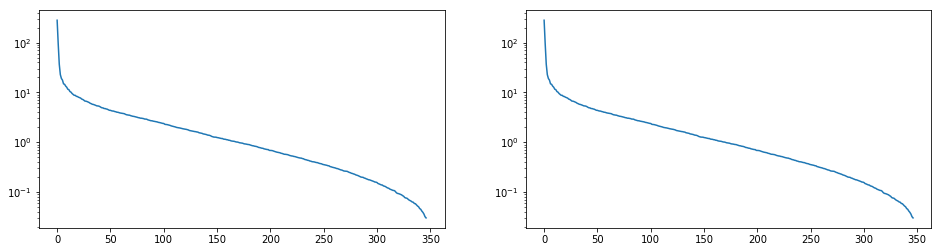

In [78]:
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.plot(s)
plt.semilogy()
plt.subplot(1,2,2)
plt.plot(s)
plt.semilogy()

In [79]:
data.shape

(347, 561)

In [80]:
U.shape

(347, 347)

In [81]:
V.shape

(561, 561)

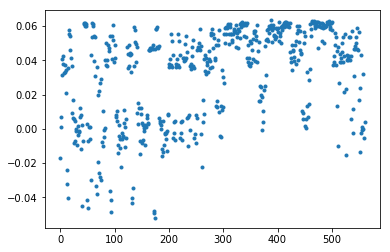

In [111]:
plt.plot(V[0,:], ".")

In [82]:
s.shape

(347,)

In [83]:
UU.shape

(561, 561)

In [84]:
VV.shape

(347, 347)

In [85]:
ss.shape

(347,)

In [86]:
# these comments are based on understanding and discussion with instructor
# V is the vector representing different unit of input space (think of Fourier transform example, each V row is one frequency)
# V - rows are ordered by importance already (most significant is the first row). E.g. DC for white noise. Or major freq. 
# first row in V is the most important row (because of matrice s and sigma-1 is the most significant one.)
# and each number in first row of V indicating importance of each sensor(one column in source data is from one sensor)
print(V[:1,:50])

[[-0.01703064  0.00112403  0.00693972  0.04097057  0.03120052  0.03773816
   0.04271866  0.03228371  0.03692658  0.03285641  0.02103029  0.03422787
  -0.03243464 -0.02397821 -0.04036979  0.03541338  0.05504699  0.05735164
   0.05401787  0.04597701  0.04128754  0.03663703  0.00896701  0.00614361
   0.01654796  0.00569243 -0.0085062   0.00459721 -0.00681613 -0.00033108
  -0.0010612  -0.00970431  0.0015208  -0.00362271 -0.00132937 -0.00212461
   0.00708054  0.01190174  0.00781365 -0.01184101 -0.04524194  0.00207655
  -0.00683123  0.06165691  0.06107714  0.05966651  0.06172004  0.06114215
   0.0597778  -0.0414132 ]]


In [87]:
# each row in data is a vector, so need to use data.T when do np.dot(V, data.T)
data.shape

(347, 561)

In [88]:
pd.unique(df_subject.Activity)

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [89]:
# each row in data is a vector, so need to use data.T when do np.dot(V, data.T)
data_projected = np.dot(V, data.T).T  
data_projected.shape

(347, 561)

In [101]:
data_projected[75:85,0:4]  # activity different from row 80. stationary -> moving. 

array([[-18.60387635,  -5.55751732,  -0.26318986,  -1.66075126],
       [-18.75501546,  -5.5674704 ,   0.62815038,  -1.84819705],
       [-18.7517452 ,  -5.7068006 ,   1.1670219 ,  -2.10435005],
       [-12.52907941,   5.30768871,   0.25789499,  -0.22452474],
       [-11.67554054,   5.46184859,   0.59859425,  -0.03154095],
       [-12.07617179,   5.32252198,   0.78971114,   0.08895135],
       [-10.90373055,   5.87804429,   0.87038052,  -0.02797209],
       [-10.96371381,   6.04629656,   0.73386421,   0.1197596 ],
       [-11.41978965,   5.30058192,   0.46052789,   0.27953148],
       [-11.79334615,   5.79631049,   0.68626631,   0.06374484]])

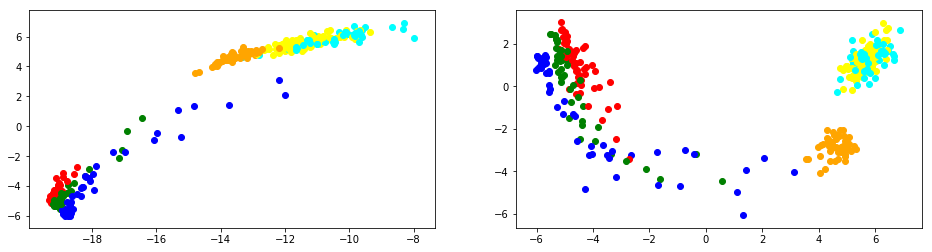

In [113]:
activity_codes = {
    "STANDING": "red", "SITTING": "green", "LAYING": "blue", "WALKING": "yellow",
    'WALKING_DOWNSTAIRS': "cyan", 'WALKING_UPSTAIRS': "orange" }

plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
for i in range(data_projected.shape[0]):
    ax = plt.scatter(data_projected[i,0], data_projected[i,1], c = activity_codes[df_subject.Activity[i]])

plt.subplot(1,2,2)
for i in range(data_projected.shape[0]):
    ax = plt.scatter(data_projected[i,1], data_projected[i,2], c = activity_codes[df_subject.Activity[i]])

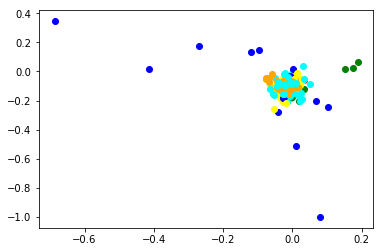

In [38]:
for i in range(data_projected.shape[0]):
    ax = plt.scatter(data[i,1], data[i,2], c = activity_codes[df_subject.Activity[i]])



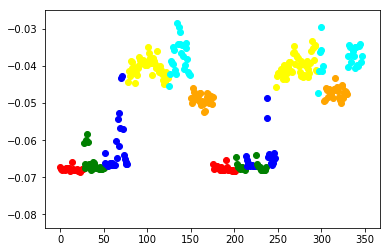

In [39]:
for i in range(data_projected.shape[0]):
    plt.scatter(i, U[i,0], c = activity_codes[df_subject.Activity[i]])


# Psuedo-Inverse

Often, we are given a $y \in \mathbb{R}^{m}$ and $A \in \mathbb{R}^{m\times n}$ and would like to find an $x \in \mathbb{R}^{n}$ so that $y = Ax$. We would like to find an inverse matrix $A^{-1}$ so that $x = A^{-1}y$.


For $A \in \mathbb{R}^{m\times n}$, a pseudoinverse of $A$ is defined as a matrix $A^+ \in\mathbb{R}^{n\times m}$ satisfying all of the following criteria:

- $AA^+A = A\qquad\qquad$($AA^+$ need not be the general identity matrix, but it maps all column vectors of $A$ to themselves);
- $\left(AA^+\right)^T = AA^+\qquad$ ($AA^+$ is *symmetric*); and
- $\left(A^+A\right)^T = A^+A\qquad$ ($A^+A$ is *symmetric*).

$A^+$ exists for any matrix $A$, but when the latter has full rank, $A^+$ can be expressed as a simple algebraic formula. In particular, when $A$ has linearly independent columns (and thus matrix $A^TA$ is invertible), $A^+$ can be computed as:

$A^+ = \left(A^TA\right)^{-1}A^T.$


This particular pseudoinverse constitutes a \emph{left inverse}, since, in this case, $A^+A = I$.

When $A$ has linearly independent rows (matrix $AA^T$ is invertible), $A^+$ can be computed as:

$A^+ = A^T\left(AA^T\right)^{-1}$

This is a *right inverse*, as $AA^+ = I$

In [116]:
df = pd.read_csv(".\data\sd-airbnb-listings.csv")

In [117]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [118]:
df.price.head()

0     $49.00
1     $59.00
2    $150.00
3    $120.00
4     $70.00
Name: price, dtype: object

In [119]:
df["price"] = df["price"].replace( '[\$,)]','', regex=True).astype(float)

In [121]:
df[['minimum_nights', 'longitude', 'latitude', 'amenities', 'number_of_reviews', u'price', 'square_feet']].describe()

,minimum_nights,longitude,latitude,number_of_reviews,price,square_feet
count,6608.000000,6608.000000,6608.000000,6608.000000,6608.000000,105.000000
mean,2.667827,-117.188281,32.775923,14.052663,212.100333,1215.828571
std,5.373163,0.063576,0.065129,29.048306,272.866480,3168.834627
min,1.000000,-117.281170,32.532181,0.000000,10.000000,0.000000
25%,1.000000,-117.249511,32.734452,0.000000,80.000000,200.000000
50%,2.000000,-117.186412,32.763080,3.000000,135.000000,840.000000
75%,3.000000,-117.144519,32.803935,14.000000,249.000000,1401.000000
max,184.000000,-116.934752,33.083107,367.000000,4900.000000,32292.000000


In [122]:
df_mini = df[['review_scores_rating',
       u'review_scores_accuracy', u'review_scores_cleanliness',
       u'review_scores_checkin', u'review_scores_communication',
       u'review_scores_location', u'review_scores_value', 'square_feet', 'price']]

In [123]:
df_mini.describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,square_feet,price
count,4482.000000,4466.000000,4467.000000,4465.000000,4469.000000,4468.000000,4468.000000,105.000000,6608.000000
mean,94.380411,9.595611,9.498545,9.789250,9.785187,9.648389,9.455685,1215.828571,212.100333
std,7.822489,0.797768,0.895671,0.604768,0.635734,0.681164,0.835499,3168.834627,272.866480
min,20.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,10.000000
25%,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,200.000000,80.000000
50%,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,840.000000,135.000000
75%,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1401.000000,249.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,32292.000000,4900.000000


In [124]:
df_clean= df_mini.dropna()

In [126]:
df_clean.shape

(94, 9)

In [125]:
df_clean.describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,square_feet,price
count,94.000000,94.00000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,94.542553,9.56383,9.425532,9.765957,9.787234,9.553191,9.404255,1267.042553,215.861702
std,4.766967,0.63175,0.782735,0.495692,0.436810,0.727598,0.627662,3340.204014,306.110866
min,80.000000,7.00000,6.000000,8.000000,8.000000,6.000000,8.000000,0.000000,33.000000
25%,93.000000,9.00000,9.000000,10.000000,10.000000,9.000000,9.000000,231.250000,75.000000
50%,95.000000,10.00000,10.000000,10.000000,10.000000,10.000000,9.000000,822.000000,135.000000
75%,98.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,1468.500000,218.750000
max,100.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,32292.000000,2500.000000


In [127]:
# y is for price only. 
# The goal is to see what is the best linear combination of these features(columns) in A(source data) to predict y. 
y = np.array(df_clean.price)  

In [128]:
A = np.array(df_clean.iloc[:,:-1]) # A is factors inpacting y.  

In [129]:
A.shape

(94, 8)

In [130]:
y.shape

(94,)

In [ ]:
x = np.dot(np.linalg.pinv(A),np.log10(y))

In [ ]:
x.shape

In [ ]:
x

In [ ]:
y_hat = np.dot(A,x)

In [ ]:
y_hat.shape

In [ ]:
plt.plot(range(y_hat.shape[0]), 10**y_hat - y, '.')

In [ ]:
A_mini = A[np.abs(10**y_hat - y) < 100,:]
y_mini = y[np.abs(10**y_hat - y) < 100]

In [ ]:
x_mini = np.dot(np.linalg.pinv(A_mini),np.log10(y_mini))

In [ ]:
y_hat_mini = np.dot(A_mini, x_mini)

In [ ]:
plt.plot(range(y_hat_mini.shape[0]), 10**y_hat_mini - y_mini, '.')

In [ ]:
np.mean(10**y_hat_mini - y_mini)

# Eigenvalues and eigenvectors

Square matrices like $A \in \mathbb{R}^{n\times n}$ are very special in that they transform inputs from $x \in \mathbb{R}^{n}$ to $y \in \mathbb{R}^{n}$

A (non-zero) vector $v$ of dimension $n$ is an **eigenvector** of a square ($n \times n$) matrix $A$ if it satisfies the linear equation

- $Av = \lambda v$


where $\lambda$ is a scalar, termed the **eigenvalue** corresponding to $v$. That is, the eigenvectors are the vectors that the linear transformation $A$ merely elongates or shrinks, and the amount that they elongate/shrink by is the eigenvalue. The above equation is called the **eigenvalue equation** or the eigenvalue problem.

This yields an equation for the eigenvalues

- $p\left(\lambda\right) = \det \left(A - \lambda \mathbf{I}\right) = 0$


We call $p\left(\lambda\right)$ the **characteristic polynomial**, and the equation, called the **characteristic equation**, is an $n$th order polynomial equation in the unknown $\lambda$. This equation will have $n_\lambda$ distinct solutions, where $1 \leq n_\lambda \leq n$ . The set of solutions, that is, the eigenvalues, is called the **spectrum** of $A$.



## Eigendecomposition of a matrix

Let $A$ be a square $n \times n$ matrix with n linearly independent eigenvectors, $q_i$ $( i = 1 , \ldots , n )$. Then $A$ can be factorized as

- $A = Q\Lambda Q^{-1}$




where $\mathbf{Q}$ is the square ($n \times n$) matrix whose $i^{th}$ column is the *normalized* eigenvector $q_i$ of $\mathbf{A}$ and $\mathbf{\Lambda}$ is the diagonal matrix whose diagonal elements are the corresponding eigenvalues, i.e., $\Lambda_{ii}=\lambda _{i}$. 



The eigenvectors $q_{i}\,\,(i=1,\dots ,N)$ are usually normalized, but they need not be. A non-normalized set of eigenvectors, $v_{i}\,\,(i=1,\dots ,N)$, can also be used as the columns of $\mathbf{Q}$. That can be understood by noting that the magnitude of the eigenvectors in $\mathbf{Q}$ gets canceled in the decomposition by the presence of $\mathbf{Q^{−1}}$.



The decomposition can be derived from the fundamental property of eigenvectors: $\mathbf{A}\mathbf{v} =\lambda \mathbf{v}$ and thus $\mathbf{A}\mathbf {Q} =\mathbf{Q}\mathbf{\Lambda}$ which yields $\mathbf{A} =\mathbf{Q}\mathbf{\Lambda }\mathbf{Q}^{-1}$.